<a href="https://colab.research.google.com/github/EmilyChakra/Car-Price-Prediction/blob/main/Car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [278]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [279]:
cars= pd.read_csv('/content/CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [280]:
print(cars.shape)  # find out the shape of dataset
cars.columns  # find out columns of dataset

(205, 26)


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# **3. Per Profiling**


##**3.1. Data Information**

In [281]:
cars.info()   # Information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

***Observation:***
1. car_ID, symboling to be dropped.
2. doornumber must be int.
3. Price is TARGET VARIABLE


### **3.2 Data Description**

In [282]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Observation**
1. There is a substantial difference between horsepower and price from 75% to 100%, indicating potential outliers.
2. If outliers exist, corrective measures may be needed to ensure data accuracy.
3. Enginesize exhibits a significant difference between the 75th and 100th percentiles.

### **3.3 Data nunique()**

In [283]:
cars.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

**Observation:**
1. Carname 147 must be checked.

### **3.4 Data Missing Value**

In [284]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# **4. Pre Processing & Post Profiling**




In [285]:
cars.drop(['car_ID', 'symboling'], axis =1, inplace= True)   # drop the columns

In [286]:
door_number_mapping= {'two': 2, 'four': 4}
# Convert 'doornumber' column to integers

cars['doornumber']= cars['doornumber'].map(door_number_mapping)


In [287]:
##check duplicate values
df_dup=cars.duplicated().any()
df_dup

False

In [288]:
categorical= cars.select_dtypes(include=['object']).columns # Selects columns with data type 'object'
numerical= cars.select_dtypes(exclude=['object']).columns   #Excludes columns with data type 'object'
print('Categorical Columns', categorical)
print('Numerical Columns', numerical)

Categorical Columns Index(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')
Numerical Columns Index(['doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


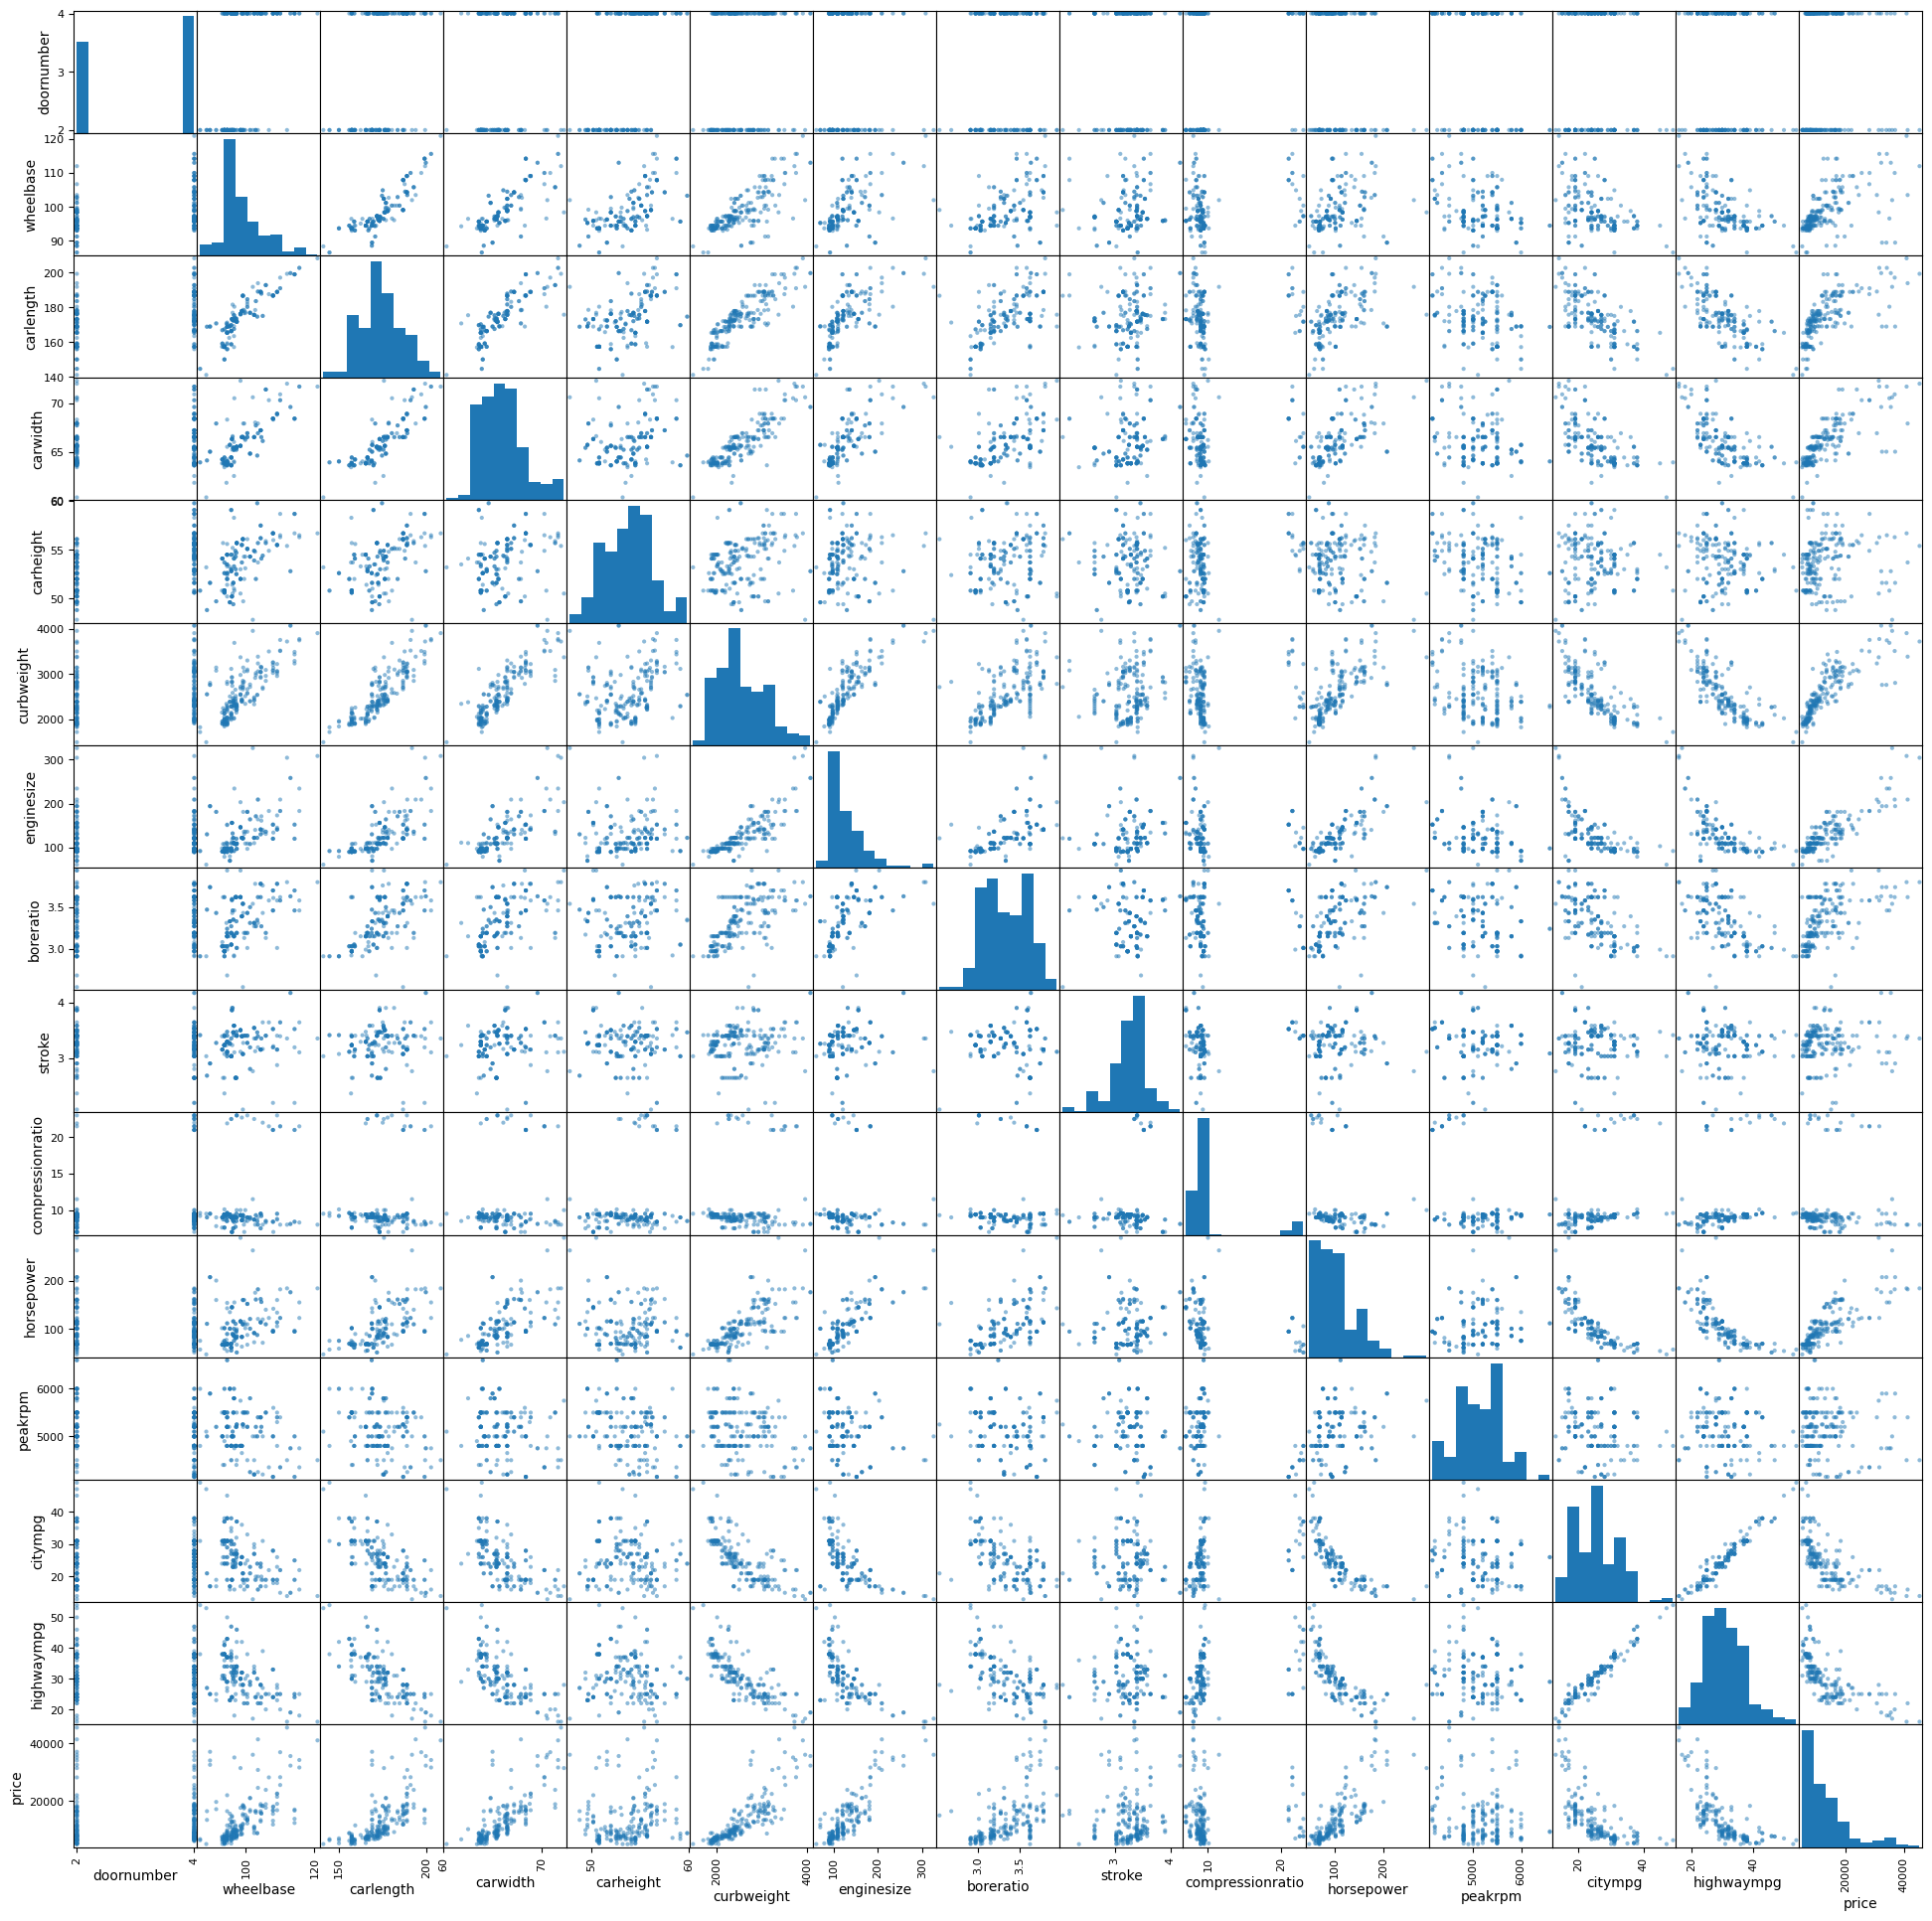

In [289]:
#Scatterplots for visualizing relationships between multiple numerical variables
from pandas.plotting import scatter_matrix
scatter_matrix(cars[numerical], figsize=(24, 24))
plt.show()

In [290]:
# What's the average price of cars in dataset?
cars.CarName.value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [291]:
cars.groupby('CarName').mean()['price']

CarName
Nissan versa                 5499.0
alfa-romero Quadrifoglio    16500.0
alfa-romero giulia          13495.0
alfa-romero stelvio         16500.0
audi 100 ls                 13950.0
                             ...   
volvo 246                   22470.0
volvo 264gl                 20522.5
volvo diesel                18950.0
vw dasher                   11595.0
vw rabbit                    9980.0
Name: price, Length: 147, dtype: float64

### **2.compare the average price for cars which horse power greater /less 100 hp?**

In [292]:
cars[cars['horsepower']<=100]['price'].mean()


8766.67256637168

In [293]:
cars[cars['horsepower']>=100]['price'].mean()

18632.251776595742

### **How is the data spread across different price ranges?**

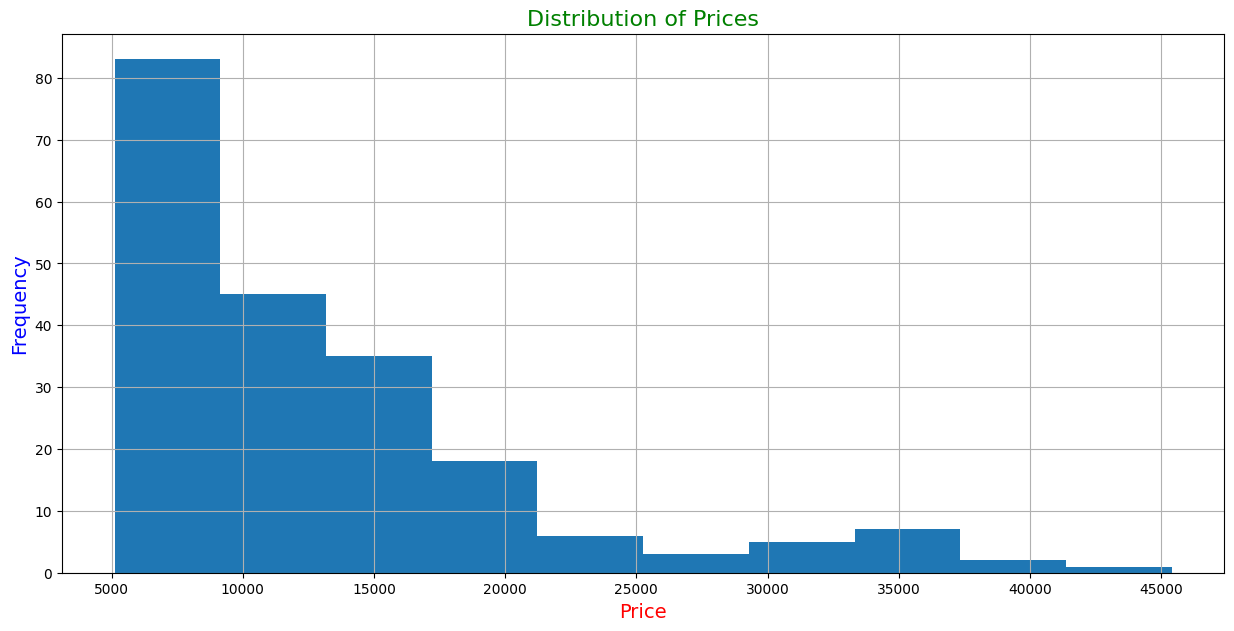

In [294]:
paper = plt.figure(figsize = [15,7])
cars['price'].plot.hist(grid=True)

plt.xlabel('Price', color='r', fontsize=14 )
plt.ylabel('Frequency', color='b', fontsize=14)
plt.title('Distribution of Prices', color='g', fontsize=16)
plt.show()

### ** What insights can we gather from the distribution of car lengths?**

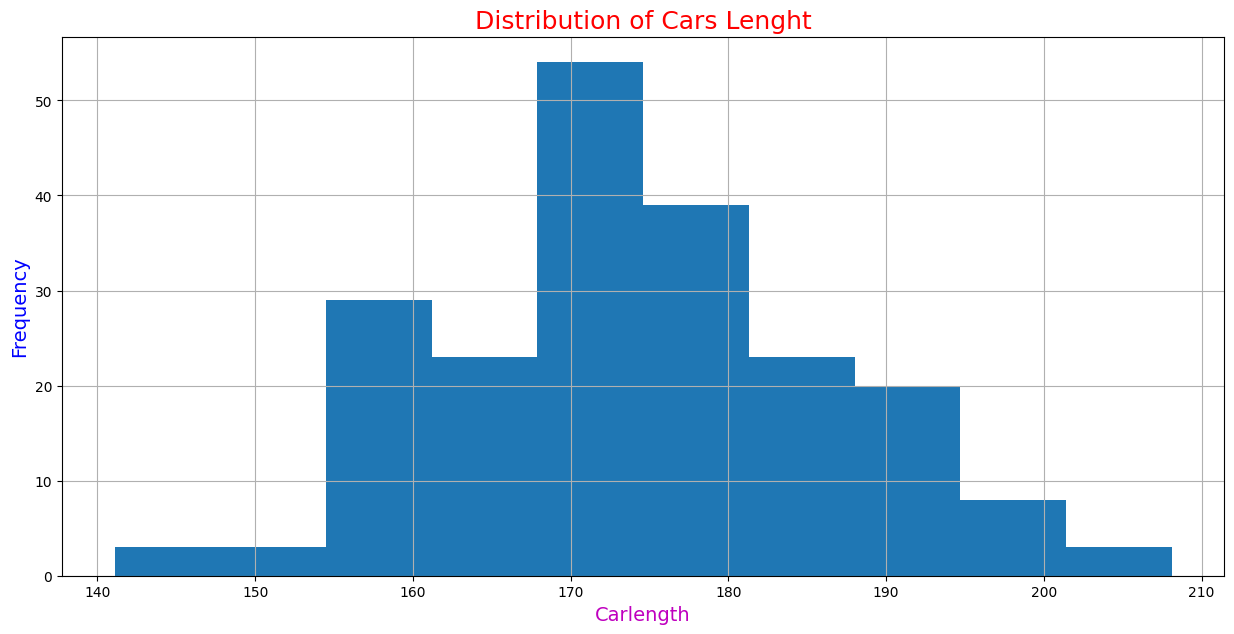

In [295]:
paper = plt.figure(figsize = [15,7])
cars['carlength'].plot.hist(grid=True)
plt.xlabel('Carlength', color='m', fontsize=14 )
plt.ylabel('Frequency', color='b', fontsize=14)
plt.title('Distribution of Cars Lenght', color='r', fontsize=18)
plt.show()

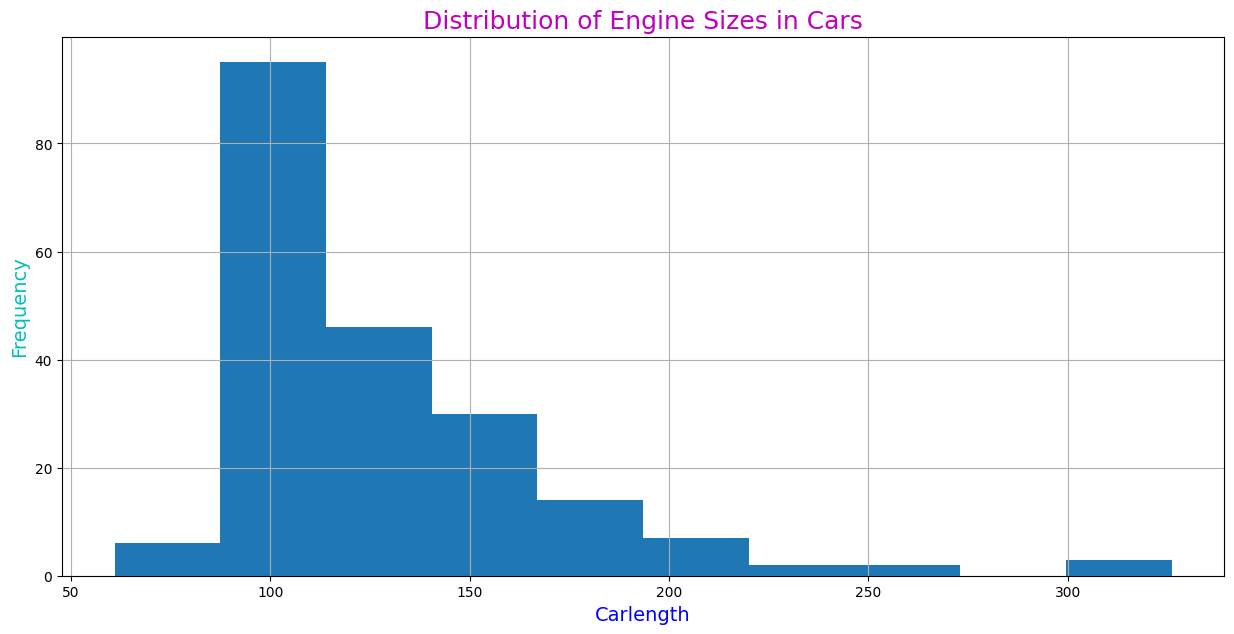

In [296]:
paper = plt.figure(figsize = [15,7])
cars['enginesize'].plot.hist(grid=True)
plt.xlabel('Carlength', color='b', fontsize=14 )
plt.ylabel('Frequency', color='c', fontsize=14)
plt.title('Distribution of Engine Sizes in Cars', color='m', fontsize=18)
plt.show()

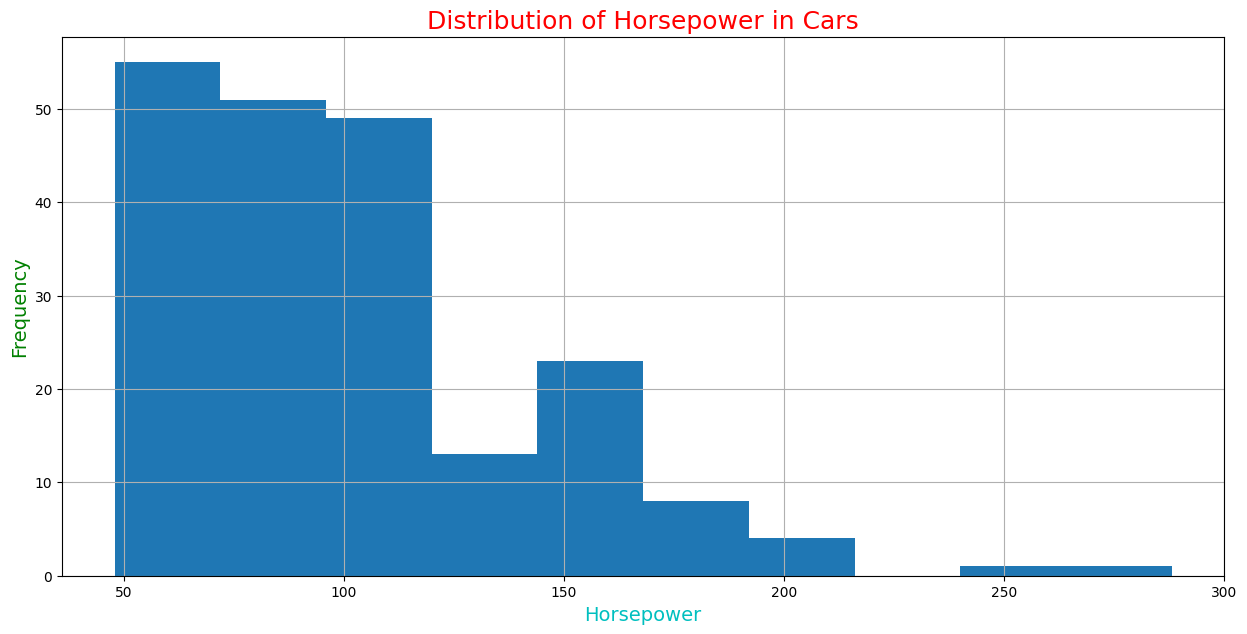

In [297]:
paper = plt.figure(figsize = [15,7])
cars['horsepower'].plot.hist(grid=True)
plt.xlabel('Horsepower', color='c', fontsize=14)
plt.ylabel('Frequency', color='g', fontsize=14)
plt.title('Distribution of Horsepower in Cars', color='r', fontsize=18)
plt.show()

### **4.Relation between car weight and price ?**

In [298]:
cars.groupby('curbweight')['price'].mean()

curbweight
1488     5151.00
1713     6479.00
1819     6855.00
1837     5399.00
1874     7605.75
          ...   
3750    28248.00
3770    31600.00
3900    40960.00
3950    36000.00
4066    33900.00
Name: price, Length: 171, dtype: float64

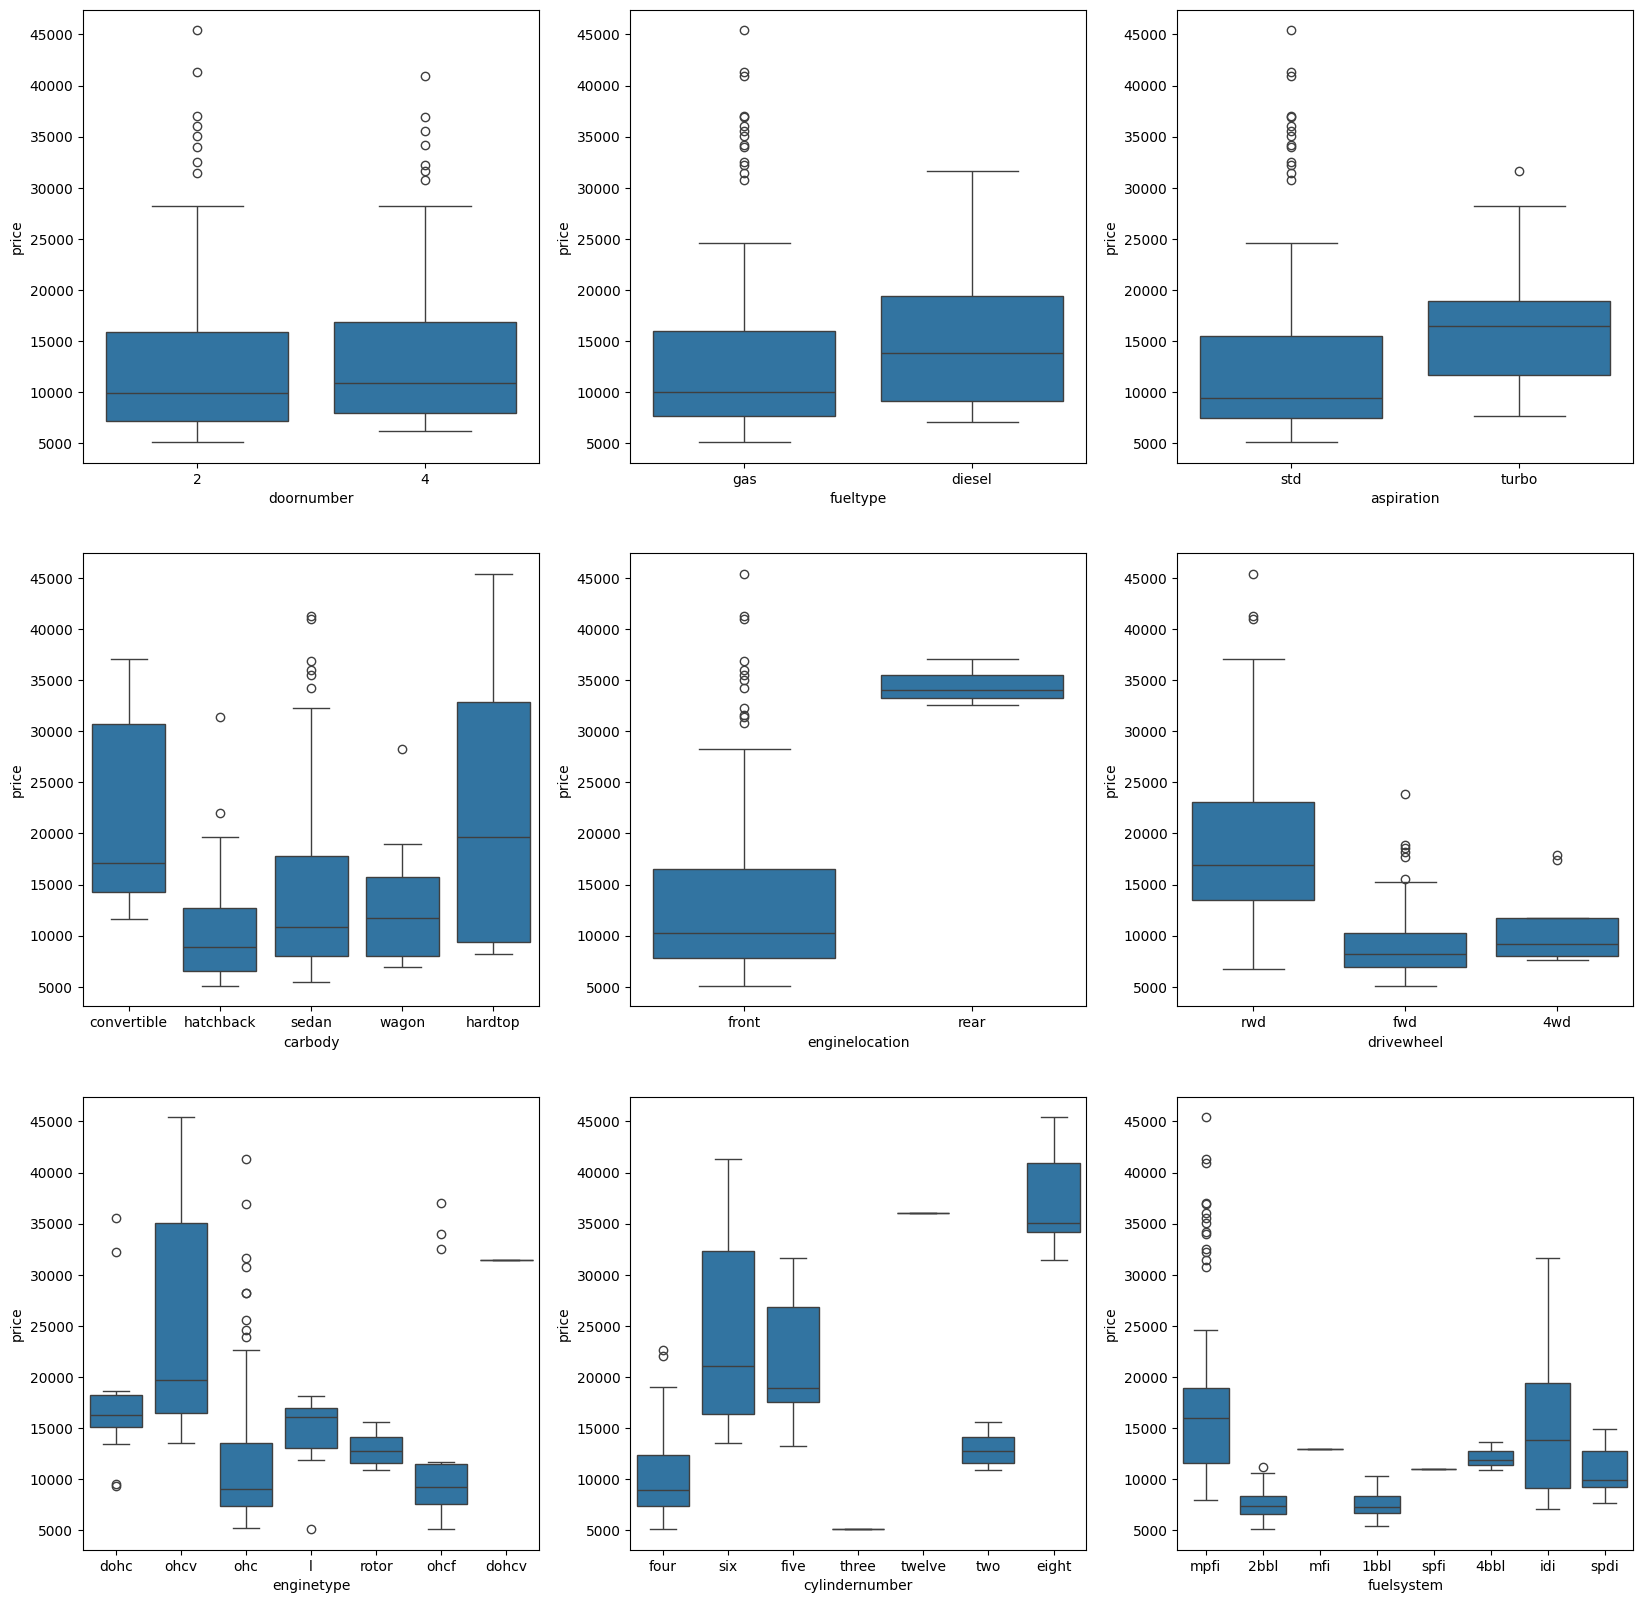

In [299]:
plt.figure(figsize=(20, 20))
columns=['doornumber','fueltype','aspiration','carbody','enginelocation','drivewheel','enginetype','cylindernumber','fuelsystem']
i=0
for col in columns:
    i=i+1
    plt.subplot(3,3,i)
    sns.boxplot(x = col, y = 'price', data = cars)
plt.show()

### **5. Convert important category data into numerical one**

In [300]:
from sklearn.preprocessing import LabelEncoder

fueltype_le=LabelEncoder()
cars['fueltype']= fueltype_le.fit_transform(cars.fueltype)
enginelocation_le=LabelEncoder()
cars['enginelocation']=enginelocation_le.fit_transform(cars.enginelocation)
cylindernumber_le=LabelEncoder()
cars['cylindernumber']=cylindernumber_le.fit_transform(cars.cylindernumber)
enginetype_le=LabelEncoder()
cars['enginetype']=enginetype_le.fit_transform(cars.enginetype)
carbody_le=LabelEncoder()
cars['carbody']=carbody_le.fit_transform(cars.carbody)
aspiration_le=LabelEncoder()
cars['aspiration']=aspiration_le.fit_transform(cars.aspiration)

In [301]:
cars.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [302]:
column= ['enginesize', 'carlength', 'horsepower']
multivaiate_df= cars[column]  # Assigne new dataframe 'multivaiate_df'
multivariate_y = cars['price']   # Assigne new dataframe 'multivariate_y'

In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(multivaiate_df, multivariate_y, test_size=0.30)    #Splits the data into training and testing sets for multivariate analysis

In [309]:
 # import Linear Regression algoritham
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train, y_train)  # Fits a model


LinearRegression()

In [310]:

# Predicts target values using 'model' on 'X_test'.
y_pred = model.predict(X_test)
pd.DataFrame({'test':y_test, 'pred':y_pred}).head()

,test,pred
155,8778.0,6727.950610
83,14869.0,18717.068908
60,8495.0,11883.899397
18,5151.0,79.038271
71,34184.0,29931.648012


## **6. Eveluation**

In [311]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f" RMSE: {mean_squared_error(y_test, y_pred)}")

MAE: 2291.0000671577936
 RMSE: 10131642.308838127


In [312]:
model.score(X_test,y_test)

0.8463640720124085